In [8]:
import numpy as np
import matplotlib.pyplot as plt

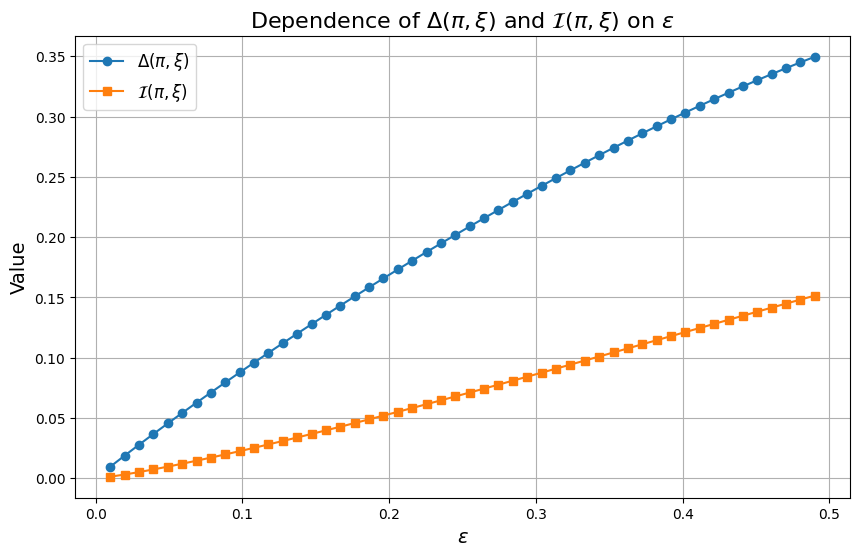

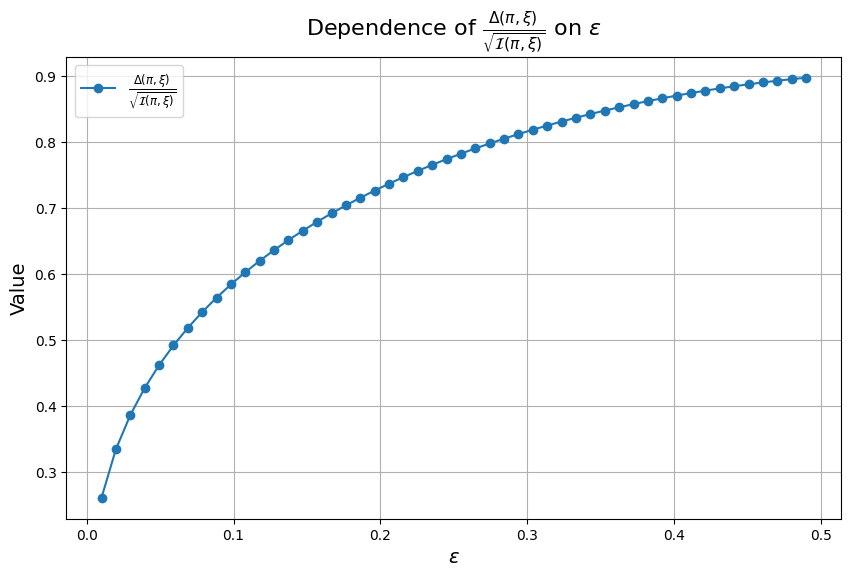

In [ ]:
epsilon = 0.1
N = 1000
# Compute the constant d = sqrt(epsilon/(1-epsilon))
d = np.sqrt(epsilon / (1 - epsilon))

# Discretize the interval [-1,1] into N points for both theta and x (theta')
theta_vals = np.linspace(-1, 1, N)
x_vals = np.linspace(-1, 1, N)

# Create a meshgrid for theta (rows) and x (columns)
theta, x = np.meshgrid(theta_vals, x_vals, indexing="ij")

# Initialize f(theta,x)
f_val = np.empty_like(theta)

# Define regions based on the piecewise definition.
# Region 1: theta <= x <= theta + d.
mask1 = (x >= theta) & (x <= theta + d)
# Region 2: theta - d <= x < theta.
mask2 = (x < theta) & (x >= theta - d)
# Region 3: otherwise.
mask3 = ~(mask1 | mask2)

# Compute f for each region.
f_val[mask1] = (1 - epsilon) * (
    theta[mask1] ** 2 + 2 * (x[mask1] - theta[mask1]) * (theta[mask1] + d)
)
f_val[mask2] = (1 - epsilon) * (
    theta[mask2] ** 2 + 2 * (x[mask2] - theta[mask2]) * (theta[mask2] - d)
)
f_val[mask3] = (1 - epsilon) * (x[mask3] ** 2) + epsilon

# Compute Delta:
# Note that f_theta(theta) = (1-epsilon) * theta^2.
# Average of f_theta(theta') over (theta, theta') is approximated by np.mean(f_val)
Delta = np.mean(f_val) - np.mean((1 - epsilon) * (theta_vals**2))

# Compute I:
# For each fixed theta' (each column) compute the conditional mean E[f_theta(theta')|theta']
cond_mean = np.mean(f_val, axis=0)  # average over theta (rows)
# I = E[(f_theta(theta') - cond_mean(theta'))^2]
I_val = np.mean((f_val - cond_mean[None, :]) ** 2)


def main():
    # Define a range of epsilon values to investigate.
    # We avoid values too close to 0 or 1 for numerical stability.
    epsilons = np.linspace(0.01, 0.49, 50)

    # Lists to store computed Delta and I for each epsilon.
    delta_list = []
    I_list = []

    N = 1000  # number of discretization points

    # Loop over epsilon values and compute expectations.
    for eps in epsilons:
        Delta, I_val = compute_expectations(epsilon=eps, N=N)
        delta_list.append(Delta)
        I_list.append(np.sqrt(I_val))

    # Plotting the results.
    plt.figure(figsize=(10, 6))
    plt.plot(epsilons, delta_list, marker="o", label=r"$\Delta(\pi, \xi)$")
    plt.plot(epsilons, I_list, marker="s", label=r"$\mathcal{I}(\pi, \xi)$")
    plt.xlabel(r"$\epsilon$", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.title(
        r"Dependence of $\Delta(\pi,\xi)$ and $\mathcal{I}(\pi,\xi)$ on $\epsilon$",
        fontsize=16,
    )
    plt.legend(fontsize=12)
    plt.grid(True)

    # also plot the ratio Delta/sqrt(I)
    ratio = np.array(delta_list) / np.sqrt(np.array(I_list))
    plt.figure(figsize=(10, 6))
    plt.plot(
        epsilons,
        ratio,
        marker="o",
        label=r"$\frac{\Delta(\pi, \xi)}{\sqrt{\mathcal{I}(\pi, \xi)}}$",
    )
    plt.xlabel(r"$\epsilon$", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.title(
        r"Dependence of $\frac{\Delta(\pi,\xi)}{\sqrt{\mathcal{I}(\pi,\xi)}}$ on $\epsilon$",
        fontsize=16,
    )
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.show()


main()